# Second Midterm Exam


## Mohaddeseh Mozaffari

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import comb
from scipy.integrate import quad
sns.set()

# Q1:

In [36]:
def p_s(n):
    """random number from P(s)

    Args:
        n (int): number of random variable we want

    Returns:
        list: list of random variable
    """
    ps = []
    while len(ps) < n:
        x = np.random.uniform(-4,4)
        y = np.random.uniform(0,1)
        yp = (1/5.4)*( ( (np.cosh(x))/((x+10)**2) + np.tanh(x) )**2)
        if y<= yp:
            ps.append(x)
    return ps

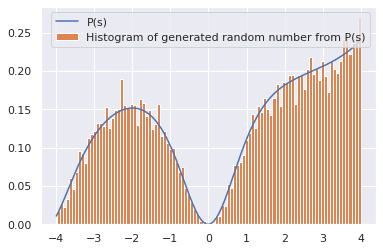

In [37]:
x = np.linspace(-4,4,1000)
y = (1/5.4)*( ( (np.cosh(x))/((x+10)**2) + np.tanh(x) )**2)
plt.plot(x,y, label="P(s)")
plt.hist(p_s(10000), density=True, bins=100, label="Histogram of generated random number from P(s)")
plt.legend()
plt.show()

In [38]:
def RW(p, N ,M):
    """random walk with probability of stpe is P(s)

    Args:
        p (float): probability
        sigma (float): standar deviation of guassian
        N (int): number of time steps
        M (int): number of ensemble

    Returns:
        2d_array: (M,N)
    """
    x = np.zeros((M,N))
    for ens in range(M):
        for t in range(1,N):
                r = np.random.random()
                dx = p_s(1)[0]
                if (dx > 0 and r<= p):
                    x[ens,t] = x[ens,t-1] + dx
                elif (dx < 0 and r>= p): 
                    x[ens,t] = x[ens,t-1] + dx
    return x

## A:

In [43]:
Xt = RW(0.5, 10000, 1000)

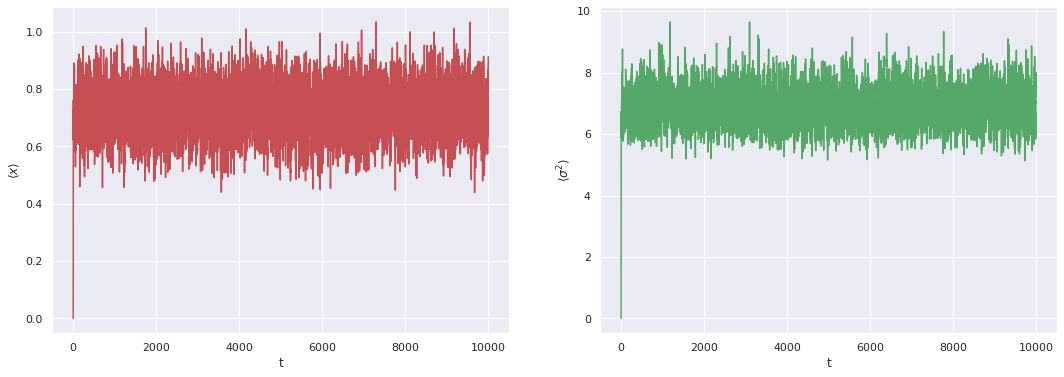

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

axes[0].plot(Xt.mean(axis=0), color="r")
axes[0].set_xlabel("t")
axes[0].set_ylabel(r"$\langle x \rangle$")

axes[1].plot(Xt.var(axis=0), color="g")
axes[1].set_xlabel("t")
axes[1].set_ylabel(r"$\langle \sigma^2 \rangle$")

plt.show()

## B:

In [61]:
# calculate mean of data from integral
f = lambda x : (x/5.4)*( ( (np.cosh(x))/((x+10)**2) + np.tanh(x) )**2)
mean =  quad(f,-4,4)[0]

In [65]:
# calculate variance of data from integral
f = lambda x : (x**2/5.4)*( ( (np.cosh(x))/((x+10)**2) + np.tanh(x) )**2)
var =  quad(f,-4,4)[0]

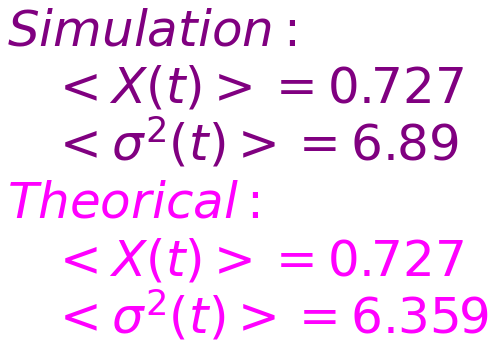

In [114]:
a = "Simulation:"
b = rf"<X(t)> = {round(Xt.mean(),3)}"
c = rf"<\sigma^2(t)> = {round(Xt.var(),3)}"
d = "Theorical:"
e = rf"<X(t)> = {round(mean,3)}"
f = rf"<\sigma^2(t)> = {round(var,3)}"

ax = plt.axes([1,1,0.5,1]) #left,bottom,width,height
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
plt.text(0,1,'$%s$' %a,size=50,color="purple")
plt.text(0.2,0.8,'$%s$' %b,size=50,color="purple")
plt.text(0.2,0.6,'$%s$' %c,size=50,color="purple")
plt.text(0,0.4,'$%s$' %d,size=50,color="magenta")
plt.text(0.2,0.2,'$%s$' %e,size=50,color="magenta")
plt.text(0.2,0,'$%s$' %f,size=50,color="magenta")
plt.show()

## C:

In [115]:
def moment(x,k):
    """calculate kth central moment of x data

    Args:
        x (array_like): data
        k (int): order of central moment

    Returns:
        float: k-th central moment
    """
    return np.mean((x)**k)

In [116]:
def cumulant(x, k, M):  
    """calculate kth cumulant of x data

    Args:
        x (array_like): data
        k (int): order of cumulant

    Returns:
        float: k-th cumulant
    """
    K = np.zeros((k,k))
    for n in range(1,k+1):
        K[n-1, 0] = M(x,n) 
        for i in range(1, n):
            K[n-1, i] = comb(n-1, n-i) * M(x,n-i)
        if n != k:
            K[n-1, n] = 1

    return  ((-1)**(k-1)) * np.linalg.det(K)

In [120]:
S = np.array(p_s(10000))

In [122]:
#find moment for data
Moment = []
for n in [3,5]:
    Moment.append(moment(S, n))

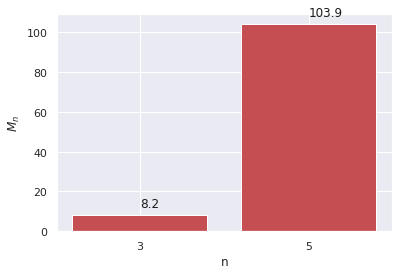

In [148]:
plt.bar([str(i) for i in [3,5]], Moment, color="r")
plt.xlabel("n")
plt.ylabel(r"$M_n$")
for i, v in enumerate(Moment):
    plt.text(i,v+4, str(round(v,2)), color='k')
plt.show()

In [149]:
#find cumulant for data
Cumulant = []
for n in [3,4,5]:
    Cumulant.append(cumulant(S, n, moment))

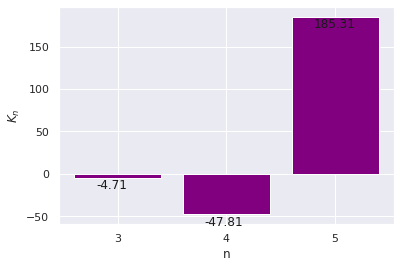

In [147]:
plt.bar([str(i) for i in [3,4,5]], Cumulant, color="purple")
plt.xlabel("n")
plt.ylabel(r"$K_n$")
for i, v in enumerate(Cumulant):
    plt.text(i-0.2,v-13, str(round(v,2)), color='k')
plt.show()

# Q2:

In [263]:
#set constant number
v_0 = 1
N = 10000
nens = 100
dt = 1
V = []

In [264]:
for e in range(nens):
    v = np.zeros(N)
    v[0] = v_0
    for t in range(1,N):
        r1, r2 = np.random.random(2)
        eta = np.sqrt(-2*np.log(r1))*np.cos(2*np.pi*r2)
        v[t] = v[t-1] - (dt * (v[t-1]**2) *(eta))
    V.append(v)
V = np.array(V)

/tmp/ipykernel_8699/1816270481.py:7: RuntimeWarning: overflow encountered in double_scalars
  v[t] = v[t-1] - (dt * (v[t-1]**2) *(eta))
/tmp/ipykernel_8699/1816270481.py:7: RuntimeWarning: invalid value encountered in double_scalars
  v[t] = v[t-1] - (dt * (v[t-1]**2) *(eta))


## A:

### $〈v(t)〉$

In [265]:
meanV = np.mean(V, axis=0)

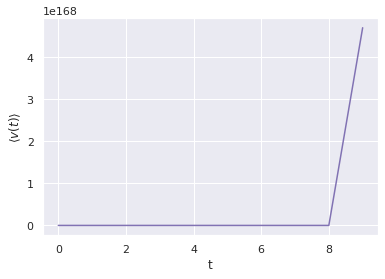

In [267]:
plt.plot(meanV, color="m")
plt.xlabel("t")
plt.ylabel(r"$\langle v(t)\rangle$")
plt.show()

### $〈v(t_1)v(t_2)〉$

In [ ]:
Meanvv = np.zeros((N,N))
for tau in range(N):
    for t in range(N-tau):
        vv = np.mean(V[:,t]*V[:,t+tau])
        Meanvv[tau,t] = vv

In [ ]:
plt.figure(figsize=(6,5))
plt.imshow(Meanvv, cmap="viridis")
plt.colorbar()
plt.show()

## B:

### PDF of local extrema

In [251]:
def find_extrema(data, dx):
    """find the extrema of data in one dimention

    Args:
        data (1d_array): data
        dx (float): step size

    Returns:
        1d_array: peak position
    """
    N = len(data) #number of data
    peakpos = []  #index of peaks

    #check first point of data
    k1 = int((data[1]-data[2])/dx)
    if k1 !=0:
        peakpos.append(1)

    for i in range(1,N-1):
        k1 = int((data[i]-data[i-1])/dx)
        k2 = int((data[i]-data[i+1])/dx)

        if k1>0 and k2>0: #condition for peak
            peakpos.append(i)
        
        elif k1<0 and k2<0: #condition for trough
            peakpos.append(i)

    #check last point of data
    k2 = int((data[N-1]-data[N-2])/dx)
    if k2 != 0:
        peakpos.append(N-1)

    return peakpos

In [235]:
def PDF(X,dx):
  """probability of data

  Args:
      X (1d_array): data
      dx (float): size of steps

  Returns:
      tuple: axis of probability and probability --> x, p(x)
  """
  n = int((X.max()-X.min())/dx) + 1
  
  axis = np.linspace(X.min(), X.max(), n)

  pdf = np.zeros(n)

  X -= X.min()

  for i in range(len(X)):
    k = int(X[i]/dx)
    pdf[k] += 1     

  pdf /= (np.sum(pdf)*dx)  

  return axis,pdf 

### Un-weighted TPCF of local maxima

In [238]:
def find_peak_1d(data, dx):
    """find the peak of data in one dimention

    Args:
        data (1d_array): data
        dx (float): step size

    Returns:
        1d_array: peak position
    """
    N = len(data) #number of data
    peakpos = []  #index of peaks

    #check first point of data
    k1 = int((data[1]-data[2])/dx)
    if k1>0:
        peakpos.append(1)

    for i in range(1,N-1):
        k1 = int((data[i]-data[i-1])/dx)
        k2 = int((data[i]-data[i+1])/dx)

        if k1>0 and k2>0: #condition for peak
            peakpos.append(i)

    #check last point of data
    k2 = int((data[N-1]-data[N-2])/dx)
    if k2>0:
        peakpos.append(N-1)

    return peakpos

In [239]:
def UTPCF_1d(data, find_peak_1d, dx=0.1):
    """calculate un-weighted two point correlation function one dimention

    Args:
        data (1d_array): data
        find_peak_1d (function): find the peak of data
        dx (float, optional): step size of find peak. Defaults to 0.1.

    Returns:
        1d_array: un_weighted 2 point correlation function
    """
    peakpos = find_peak_1d(data, dx)
    N = len(data)
    npeak = len(peakpos)

    p = np.zeros(N)
    for i in range(npeak):
        for j in range(i+1, npeak):
            R = int((peakpos[i]-peakpos[j]))
            p[R] += 1

    psi = []
    for r in range(N):
        s = (p[r]/(npeak**2/(2*N)))-1
        psi.append(s)

    return psi